In [1]:
#IMPORTING LIBRARIES
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
!pip install graphviz python-graphviz
!pip install -U imbalanced-learn


ERROR: Could not find a version that satisfies the requirement python-graphviz (from versions: none)
ERROR: No matching distribution found for python-graphviz
     |████████████████████████████████| 215kB 5.5MB/s 
     |████████████████████████████████| 22.3MB 1.2MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1
  Found existing installation: imbalanced-learn 0.4.3
    Uninstalling imbalanced-learn-0.4.3:
      Successfully uninstalled imbalanced-learn-0.4.3


In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
#IMPORTING THE DATASET
dataset = pd.read_excel('input_female.xlsx')
pd.set_option('max_rows', 99999)
pd.set_option('max_colwidth', 400)
pd.describe_option('max_colwidth')

display.max_colwidth : int or None
    The maximum width in characters of a column in the repr of
    a pandas data structure. When the column overflows, a "..."
    placeholder is embedded in the output. A 'None' value means unlimited.
    [default: 50] [currently: 400]


In [ ]:
print(dataset)

    Catergory  Ferritin    FSH  ...  Progesterone   MDA   Protein Carbonyl
0           1      2245   1.06  ...          1.57  12.37              1.47
1           1      2368   1.96  ...          1.19  11.69              2.07
2           1      2361   0.59  ...          1.21  13.69              2.61
3           1      1700   5.27  ...          1.16   9.20              1.63
4           1      6214   3.41  ...          0.29  14.35              2.09
5           1      1607   7.68  ...          2.20   7.28              1.63
6           1      2629   1.03  ...          3.29  13.05              2.33
7           1      6041   0.21  ...          0.65  13.74              2.20
8           1      2789   2.38  ...          0.84  12.57              1.99
9           1      1840   2.38  ...          2.09   9.20              1.92
10          1      2313   1.37  ...          2.14  11.03              1.72
11          1      2846   0.04  ...          0.54  13.20              1.86
12          1      2980  

In [ ]:
#VALIDATION DATASET
dataset_validation=dataset.sample(frac=0.18, random_state=10)

In [ ]:
print(dataset_validation)

    Catergory  Ferritin    FSH  ...  Progesterone   MDA   Protein Carbonyl
20          1      3877   0.19  ...          1.24  13.87              2.16
3           1      1700   5.27  ...          1.16   9.20              1.63
46          2        27   6.20  ...          6.99   1.54              1.17
17          1      6170   0.06  ...          0.55  14.36              2.21
31          2        47   1.03  ...          5.45   6.81              0.78
35          2        43  20.65  ...          9.45   5.00              0.82
39          2        13   6.30  ...          7.46   6.15              1.10
26          1      4160   0.56  ...          0.46  16.28              2.47
21          1      3690   0.53  ...          0.10  13.63              2.41
38          2        60   3.90  ...          4.72   4.29              0.81

[10 rows x 8 columns]


In [ ]:
#TRAINING DATASET
np.random.seed(10)
remove_n = 10
drop_indices = np.random.choice(dataset.index, remove_n, replace=False)
dataset_training = dataset.drop(drop_indices)

In [ ]:
print(dataset_training)

    Catergory  Ferritin    FSH  ...  Progesterone   MDA   Protein Carbonyl
0           1      2245   1.06  ...          1.57  12.37              1.47
1           1      2368   1.96  ...          1.19  11.69              2.07
2           1      2361   0.59  ...          1.21  13.69              2.61
4           1      6214   3.41  ...          0.29  14.35              2.09
5           1      1607   7.68  ...          2.20   7.28              1.63
6           1      2629   1.03  ...          3.29  13.05              2.33
7           1      6041   0.21  ...          0.65  13.74              2.20
8           1      2789   2.38  ...          0.84  12.57              1.99
9           1      1840   2.38  ...          2.09   9.20              1.92
10          1      2313   1.37  ...          2.14  11.03              1.72
11          1      2846   0.04  ...          0.54  13.20              1.86
12          1      2980   0.95  ...          2.59  10.46              2.01
13          1      1689  

In [ ]:
X = dataset.iloc[:,1:8].values
y = dataset.iloc[:, -1].values

In [ ]:
print(X)

[[2.2450e+03 1.0600e+00 1.6600e+00 1.6500e+00 1.5700e+00 1.2370e+01
  1.4700e+00]
 [2.3680e+03 1.9600e+00 1.2100e+00 7.5600e+00 1.1900e+00 1.1690e+01
  2.0700e+00]
 [2.3610e+03 5.9000e-01 3.9000e-01 7.6900e+00 1.2100e+00 1.3690e+01
  2.6100e+00]
 [1.7000e+03 5.2700e+00 1.0600e+00 2.0640e+01 1.1600e+00 9.2000e+00
  1.6300e+00]
 [6.2140e+03 3.4100e+00 3.3000e-01 6.8000e-01 2.9000e-01 1.4350e+01
  2.0900e+00]
 [1.6070e+03 7.6800e+00 8.4000e+00 8.2900e+00 2.2000e+00 7.2800e+00
  1.6300e+00]
 [2.6290e+03 1.0300e+00 1.5000e+00 3.3800e+00 3.2900e+00 1.3050e+01
  2.3300e+00]
 [6.0410e+03 2.1000e-01 4.0000e-01 4.1100e+00 6.5000e-01 1.3740e+01
  2.2000e+00]
 [2.7890e+03 2.3800e+00 7.9000e-01 9.1000e-01 8.4000e-01 1.2570e+01
  1.9900e+00]
 [1.8400e+03 2.3800e+00 1.0000e+00 8.6200e+00 2.0900e+00 9.2000e+00
  1.9200e+00]
 [2.3130e+03 1.3700e+00 5.9000e-01 1.9600e+00 2.1400e+00 1.1030e+01
  1.7200e+00]
 [2.8460e+03 4.0000e-02 3.6000e-01 2.1900e+00 5.4000e-01 1.3200e+01
  1.8600e+00]
 [2.9800e+03 9.5

In [ ]:
print(y)

[1.47 2.07 2.61 1.63 2.09 1.63 2.33 2.2  1.99 1.92 1.72 1.86 2.01 1.75
 1.93 1.6  2.04 2.21 2.05 1.48 2.16 2.41 2.15 1.85 2.35 2.33 2.47 1.84
 0.77 0.74 0.85 0.78 0.85 0.81 0.9  0.82 1.28 0.72 0.81 1.1  1.11 1.26
 1.01 1.   1.23 1.16 1.17 1.05 0.9  0.91 1.02 1.09 1.01 1.02 0.91]


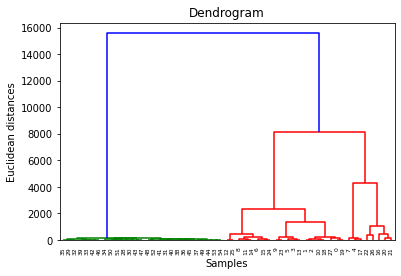

In [ ]:
## Using the dendrogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Euclidean distances')
plt.show()

In [ ]:
## Training the Hierarchical Clustering model on the dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

In [ ]:
print(y_hc)

[0 0 0 0 3 0 0 3 0 0 0 0 0 0 0 0 2 3 0 0 2 2 2 0 0 0 2 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [ ]:
#COUNTING THE NUMBER OF PATIENTS WITH NO DISEASE
no_disease=0
for i in y_hc:
    if i==1:
        no_disease+=1
print(no_disease)

27


In [ ]:
#COUNTING THE NUMBER OF PATIENTS IN EACH SEVERITY LEVEL OF HAVING DISEASE
dis_severity=[]
cluster_0=0
cluster_3=0
cluster_2=0
for i in y_hc:
    if i!=1:
        if i==0:
            cluster_0+=1
        elif i==2:
            cluster_2+=1
        else:
            cluster_3+=1
print("Cluster 1:",no_disease)
print("Cluster 3:",cluster_3)
print("Cluster 2:",cluster_2)
print("Cluster 0:",cluster_0)

Cluster 1: 27
Cluster 3: 3
Cluster 2: 5
Cluster 0: 20


In [ ]:
#CLUSTER 3: SEVERE DISEASE
#CLUSTER 2: MODERATE DISEASE
#CLUSTER 1: NO DISEASE
#CLUSTER 0: MILD DISEASE

In [ ]:
#APPENDING THE CLUSTER LABELS TO THE ORIGINAL DATA
dataset = dataset.copy()
dataset['Cluster'] = y_hc
display(dataset.sort_values(by='Cluster'))

,Catergory,Ferritin,FSH,LH,Estradiol,Progesterone,MDA,Protein Carbonyl,Cluster
0,1,2245,1.06,1.66,1.65,1.57,12.37,1.47,0
25,1,3017,0.87,0.33,2.36,0.98,13.55,2.33,0
24,1,2710,1.31,0.76,3.89,1.03,12.94,2.35,0
23,1,1813,0.62,0.30,3.88,0.45,12.51,1.85,0
19,1,2235,0.32,0.89,4.86,0.36,11.80,1.48,0
18,1,2339,1.19,0.12,5.09,0.46,11.77,2.05,0
15,1,2681,8.62,3.31,13.98,1.45,10.28,1.60,0
14,1,2832,7.67,2.17,10.19,1.47,9.11,1.93,0
13,1,1689,3.93,3.81,26.52,2.94,7.32,1.75,0
12,1,2980,0.95,3.07,1.01,2.59,10.46,2.01,0


In [ ]:
#CLASSIFICATION

In [ ]:
X2 = dataset_training.iloc[:,1:8].values
y2 = dataset_training.iloc[:, -1].values

In [ ]:
print(X2)

In [ ]:
print(y2)

In [ ]:
tr_score=[]
ts_score=[]
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier


for j in range(1000):

            X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2 , random_state =j,     test_size=0.2)
            classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2).fit(X2_train, y2_train)

            tr_score.append(classifier.score(X2_train, y2_train))
            ts_score.append(classifier.score(X2_test, y2_test))

J = ts_score.index(np.max(ts_score))
print(J)

In [ ]:
#SPLITTING THE DATASET INTO TRAINING SET AND TEST SET
from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.2, random_state = 0)

In [ ]:
#FEATURE SELECTION
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X2_train = sc.fit_transform(X2_train)
X2_test = sc.transform(X2_test)

In [ ]:
#KNN

In [ ]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 10):
    knn = KNeighborsClassifier(n_neighbors=i)
   
    knn.fit(X2_train, y2_train)
    pred_i = knn.predict(X2_train)
    error.append(np.mean(pred_i != y2_train))

In [ ]:

plt.figure(figsize=(12, 6))
plt.plot(range(1, 10), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [ ]:
#TRAINING KNN MODEL ON THE TRAINING SET
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X2_train, y2_train)

In [ ]:
#PREDICTING THE TRAINING SET RESULTS
y_pred1= classifier.predict(X2_train)
print(np.concatenate((y_pred1.reshape(len(y_pred1),1), y2_train.reshape(len(y2_train),1)),1))

In [ ]:
#PREDICTING THE TEST SET RESULTS
y_pred2 = classifier.predict(X2_test)
print(np.concatenate((y_pred2.reshape(len(y_pred2),1), y2_test.reshape(len(y2_test),1)),1))

In [ ]:
#CONFUSION MATRIX AND ACCURACY based on TEST set
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred2 = classifier.predict(X2_test)
cm1 = confusion_matrix(y2_test, y_pred2)
print(cm1)
accuracy_score(y2_test, y_pred2)

In [ ]:
sensitivity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity )
specificity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity)


In [ ]:
#APPLYING K FOLD CROSS VALIDATION
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X2_train, y = y2_train, cv = 3)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

In [ ]:
#CONFUSION MATRIX AND ACCURACY based on TRAINING set
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred1 = classifier.predict(X2_train)
cm2 = confusion_matrix(y2_train, y_pred1)
print(cm2)
accuracy_score(y2_train, y_pred1)

In [ ]:
sensitivity = cm2[0,0]/(cm2[0,0]+cm2[0,1])
print('Sensitivity : ', sensitivity )
specificity = cm2[1,1]/(cm2[1,0]+cm2[1,1])
print('Specificity : ', specificity)

In [ ]:
#APPLYING K FOLD CROSS VALIDATION
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X2_train, y = y2_train, cv = 3)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

In [ ]:
#PREDICTING A NEW RESULT
print(classifier.predict(sc.transform([[6241,3.14,0.33,0.68,0.29,14.35,4.09]])))

In [ ]:
#TRAINING KNN MODEL ON THE TRAINING SET
from sklearn.neighbors import KNeighborsClassifier
classifier_2 = KNeighborsClassifier(n_neighbors = 1, metric = 'minkowski', p = 2)
classifier_2.fit(X2_train, y2_train)

In [ ]:
y_pred2 = classifier_2.predict(X2_test)
print(np.concatenate((y_pred2.reshape(len(y_pred2),1), y2_test.reshape(len(y2_test),1)),1))

In [ ]:
#CONFUSION MATRIX AND ACCURACY
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred2 = classifier_2.predict(X2_test)
cm3 = confusion_matrix(y2_test, y_pred2)
print(cm3)
accuracy_score(y2_test, y_pred2)

In [ ]:
sensitivity = cm3[0,0]/(cm3[0,0]+cm3[0,1])
print('Sensitivity : ', sensitivity )
specificity = cm3[1,1]/(cm3[1,0]+cm3[1,1])
print('Specificity : ', specificity)

In [ ]:
#APPLYING K FOLD CROSS VALIDATION
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier_2, X = X2_train, y = y2_train, cv = 3)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

In [ ]:
y_pred9 = classifier_2.predict(X2_train)
print(np.concatenate((y_pred9.reshape(len(y_pred9),1), y2_train.reshape(len(y2_train),1)),1))

In [ ]:
#CONFUSION MATRIX AND ACCURACY based on TRAINING set
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred9 = classifier_2.predict(X2_train)
cm9 = confusion_matrix(y2_train, y_pred9)
print(cm9)
accuracy_score(y2_train, y_pred9)

In [ ]:
##SVM

In [ ]:
tr_score=[]
ts_score=[]
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC


for j in range(1000):

            X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2 , random_state =j,     test_size=0.2)
            classifier2 = SVC(kernel = 'linear', random_state = 0).fit(X2_train, y2_train)

            tr_score.append(classifier2.score(X2_train, y2_train))
            ts_score.append(classifier2.score(X2_test, y2_test))

J = ts_score.index(np.max(ts_score))
print(J)

In [ ]:
#SPLITTING THE DATASET INTO TRAINING SET AND TEST SET
from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.2, random_state = 0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X2_train = sc.fit_transform(X2_train)
X2_test = sc.transform(X2_test)

In [ ]:
#SUPPORT VECTOR MACHINE
from sklearn.svm import SVC
classifier2 = SVC(kernel = 'linear', random_state = 0)
classifier2.fit(X2_train, y2_train)

In [ ]:
#PREDICTING THE TRAINING SET RESULTS
y_pred4= classifier2.predict(X2_train)
print(np.concatenate((y_pred4.reshape(len(y_pred4),1), y2_train.reshape(len(y2_train),1)),1))

In [ ]:
#CONFUSION MATRIX AND ACCURACY based on TRAINING set
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred4 = classifier2.predict(X2_train)
cm10 = confusion_matrix(y2_train, y_pred4)
print(cm10)
accuracy_score(y2_train, y_pred4)

In [ ]:
sensitivity = cm10[0,0]/(cm10[0,0]+cm10[0,1])
print('Sensitivity : ', sensitivity )
specificity = cm10[1,1]/(cm10[1,0]+cm10[1,1])
print('Specificity : ', specificity)

In [ ]:
#PREDICTING THE TEST SET RESULTS
y_pred3 = classifier2.predict(X2_test)
print(np.concatenate((y_pred3.reshape(len(y_pred3),1), y2_test.reshape(len(y2_test),1)),1))

In [ ]:
#CONFUSION MATRIX AND ACCURACY
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred3 = classifier2.predict(X2_test)
cm4 = confusion_matrix(y2_test, y_pred3)
print(cm4)
accuracy_score(y2_test, y_pred3)

In [ ]:
sensitivity = cm4[0,0]/(cm4[0,0]+cm4[0,1])
print('Sensitivity : ', sensitivity )
specificity = cm4[1,1]/(cm4[1,0]+cm4[1,1])
print('Specificity : ', specificity)

In [ ]:
#APPLYING K FOLD CROSS VALIDATION
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier2, X = X2_train, y = y2_train, cv = 3)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

In [ ]:
#PREDICTING A NEW RESULT
print(classifier2.predict(sc.transform([[6241,3.14,0.33,0.68,0.29,14.35,4.09]])))

In [ ]:
#CONFUSION MATRIX AND ACCURACY BASED ON TRAINING SET
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred4 = classifier2.predict(X2_train)
cm5 = confusion_matrix(y2_train, y_pred4)
print(cm5)
accuracy_score(y2_train, y_pred4)

In [ ]:
sensitivity = cm5[0,0]/(cm5[0,0]+cm5[0,1])
print('Sensitivity : ', sensitivity )
specificity = cm5[1,1]/(cm5[1,0]+cm5[1,1])
print('Specificity : ', specificity)

In [ ]:
#APPLYING K FOLD CROSS VALIDATION
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier2, X = X2_train, y = y2_train, cv = 3)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

In [ ]:
##NAIVE BAYES

In [ ]:
tr_score=[]
ts_score=[]
from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import GaussianNB

for j in range(1000):

            X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2 , random_state =j,     test_size=0.2)
            classifier3 = GaussianNB().fit(X2_train, y2_train)

            tr_score.append(classifier3.score(X2_train, y2_train))
            ts_score.append(classifier3.score(X2_test, y2_test))

J = ts_score.index(np.max(ts_score))
print(J)

In [ ]:
#SPLITTING THE DATASET INTO TRAINING SET AND TEST SET
from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.2, random_state = 6)

In [ ]:
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X2_train = sc.fit_transform(X2_train)
# X2_test = sc.transform(X2_test)

In [ ]:
#NAIVE BAYES CLASSIFICATION
from sklearn.naive_bayes import GaussianNB
classifier3 = GaussianNB()
classifier3.fit(X2_train, y2_train)

In [ ]:
#PREDICTING THE TEST SET RESULTS
y_pred6 = classifier3.predict(X2_test)
print(np.concatenate((y_pred6.reshape(len(y_pred6),1), y2_test.reshape(len(y2_test),1)),1))

In [ ]:
concat1=np.column_stack((X2_test,y_pred6))
df1 = pd.DataFrame(concat1)
display(df1)

In [ ]:
#CONFUSION MATRIX AND ACCURACY
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred6 = classifier3.predict(X2_test)
cm6 = confusion_matrix(y2_test, y_pred6)
print(cm6)
accuracy_score(y2_test, y_pred6)

In [ ]:
sensitivity = cm6[0,0]/(cm6[0,0]+cm6[0,1])
print('Sensitivity : ', sensitivity )
specificity = cm6[1,1]/(cm6[1,0]+cm6[1,1])
print('Specificity : ', specificity)

In [ ]:
#PREDICTING THE Training SET RESULTS
y_pred7 = classifier3.predict(X2_train)
print(np.concatenate((y_pred7.reshape(len(y_pred7),1), y2_train.reshape(len(y2_train),1)),1))

In [ ]:
concat=np.column_stack((X2_train,y_pred7))
df = pd.DataFrame(concat)
display(df)

In [ ]:
#CONFUSION MATRIX AND ACCURACY
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred7 = classifier3.predict(X2_train)
cm7 = confusion_matrix(y2_train, y_pred7)
print(cm7)
accuracy_score(y2_train, y_pred7)

In [ ]:
sensitivity = cm7[0,0]/(cm7[0,0]+cm7[0,1])
print('Sensitivity : ', sensitivity )
specificity = cm7[1,1]/(cm7[1,0]+cm7[1,1])
print('Specificity : ', specificity)

In [ ]:
#APPLYING K FOLD CROSS VALIDATION
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier3, X = X2_train, y = y2_train, cv = 3)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

In [ ]:
#PREDICTING A NEW RESULT
print(classifier3.predict(sc.transform([[6241,3.14,0.33,0.68,0.29,14.35,4.09]])))